# Figure 1

Import pandas and matplotlib librairies

In [1]:
import pandas as pd                     # Data
import matplotlib.pyplot as plt         # Plot
import matplotlib.dates as mdates       # Plot
import datetime as dt                   # Plot
import matplotlib.transforms as mtrans  # Plot

Use Latex Font

In [2]:
# plt.rcParams.update({"text.usetex": True,
#                      "font.family": "serif",
#                      "font.serif": ["Computer Modern"],
#                      "font.size": 11,
#                      "axes.labelsize": 11,
#                      "legend.fontsize": 11,
#                      "xtick.labelsize": 9,
#                      "ytick.labelsize": 9})

## Data & Methods

Read capacity factor verification data from 2014 to 2023

In [3]:
df_cf = pd.read_csv('../Data/cf_verification_2014-2023.csv',
                    index_col = 0,
                    parse_dates = True,
                    usecols = ['datetime', 'Wind OBS']).dropna()

Set starting and ending dates

In [4]:
start_date = '2021-07-07'
end_date = '2021-07-15'

In [5]:
df_cf = df_cf[(start_date <= df_cf.index) & (df_cf.index < end_date)]

Create moving average

In [6]:
df_cf_roll = df_cf.rolling(window = '24h', center = True).mean()

## Plot

In [7]:
col = '#2ca02c'
col_roll = '#e377c2'

myFmt = mdates.DateFormatter('%d')

cm = 1 / 2.54

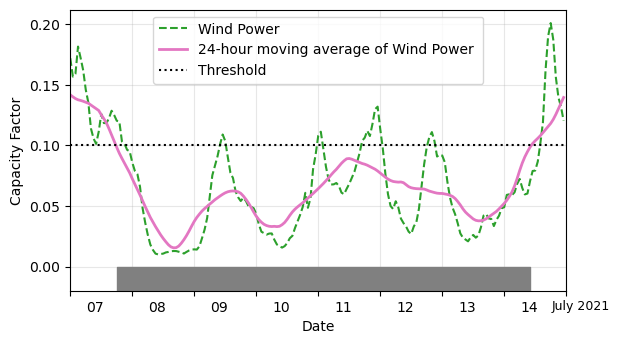

In [8]:
fig, ax = plt.subplots(1, 1,
                       figsize = (16*cm, 9*cm))

# Wind data
ax.plot(df_cf.index, df_cf['Wind OBS'], 
        ls = '--', 
        lw = 1.5, 
        color = col, 
        label = 'Wind Power', 
        zorder = 2)
# Rolling wind data
ax.plot(df_cf_roll.index, df_cf_roll['Wind OBS'],
        ls = '-',
        lw = 2, 
        color = col_roll, 
        label = '24-hour moving average of Wind Power ', 
        zorder = 2)

# Threshold
ax.axhline(0.1,
           ls = ':',
           lw = 1.5,
           color = 'black',
           label = 'Threshold')
# Wind drought
ax.fill_between(df_cf_roll.index, 0, -0.02,
                where = df_cf_roll['Wind OBS'] < 0.1, 
                color = 'grey', 
                zorder = 2)

# X-axis
ax.set_xlabel('Date')
ax.set_xlim(dt.datetime.strptime(start_date, '%Y-%m-%d'),
            dt.datetime.strptime(end_date, '%Y-%m-%d'))
ax.xaxis.set_major_formatter(myFmt)
# Move the xlabel to the right (This is correct even if it does not look like it on the plot)
trans = mtrans.Affine2D().translate(25, 0)
for t in ax.get_xticklabels():
    t.set_transform(t.get_transform()+trans)
# Remove the last x-tick label
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
xticklabels[-1].set_visible(False)
ax.text(0.97, -0.066, 'July 2021', transform=ax.transAxes, fontsize = 9)

# Y-axis
ax.set_ylabel('Capacity Factor')
ax.set_ylim(-0.02)

# Grid
ax.grid(True, alpha = 0.3, zorder = 0)

# Legend
ax.legend(loc = 'upper center')

fig.tight_layout()
# fig.savefig('01_methodology_identification.pdf', bbox_inches = 'tight')